# Previous Violation Interactions Experiment

**Goal**: Run an experiment sweeping over sigmas to assess the effect of adding in interaction terms to the multi-class model

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import sys
[
    sys.path.append(str(folder))
    for folder in pathlib.Path("../src/").iterdir()
    if folder.is_dir()
]

from fitting_utils import create_violation_interaction_pairs
from experiment_sigma_sweep import ExperimentSigmaSweep
from multiclass_logistic_regression import MultiClassLogisticRegression
from model_visualizer import ModelVisualizer

sns.set_context("talk")
%load_ext autoreload
%autoreload 2

In [2]:
params = {
    "animals": None,
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "model_config": {
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": "DesignMatrixGeneratorInteractions",
        "design_matrix_generator_args": {
            "filter_column": "prev_violation",
            "interaction_pairs": create_violation_interaction_pairs(["s_a", "s_b"]),
        },
    },
}

In [3]:
experiment = ExperimentSigmaSweep(params)
experiment.run()
experiment.save(file_name="2023_10_23_prev_violation_interactions_stim_only")

returning viol dataset for all animals


 !!!!! evaluating animal W051 !!!!!


         Current function value: 41163.808690
         Iterations: 27
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 40733.110147
         Iterations: 29
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 40520.737100
         Iterations: 31
         Function evaluations: 40
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 40447.561549
         Iterations: 29
         Function evaluations: 40
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 40427.938482
         Iterations: 29
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 40422.94

In [4]:
# for weight plot
feature_order = [
    "bias",
    "prev_violation_exp",
    "s_a",
    "prev_violation_exp_x_s_a",
    "s_b",
    "prev_violation_exp_x_s_b",
    "prev_sound_avg",
    "prev_correct",
    "prev_choice",
]

palette = "Set2"

mv = ModelVisualizer(experiment)

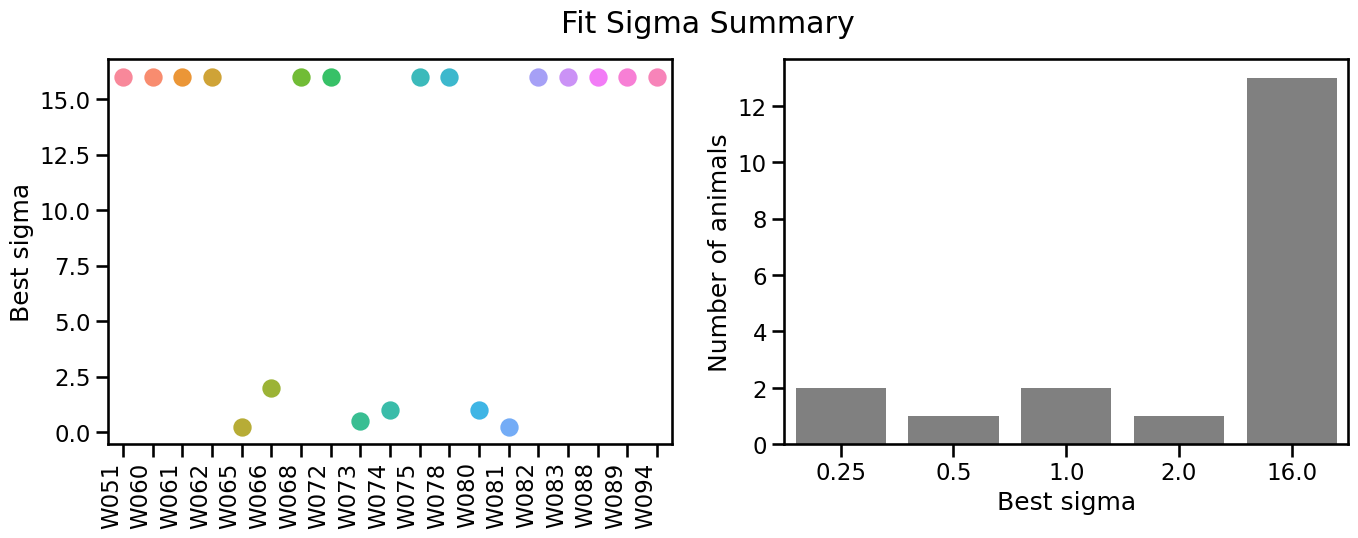

In [5]:
mv.plot_sigma_summary()

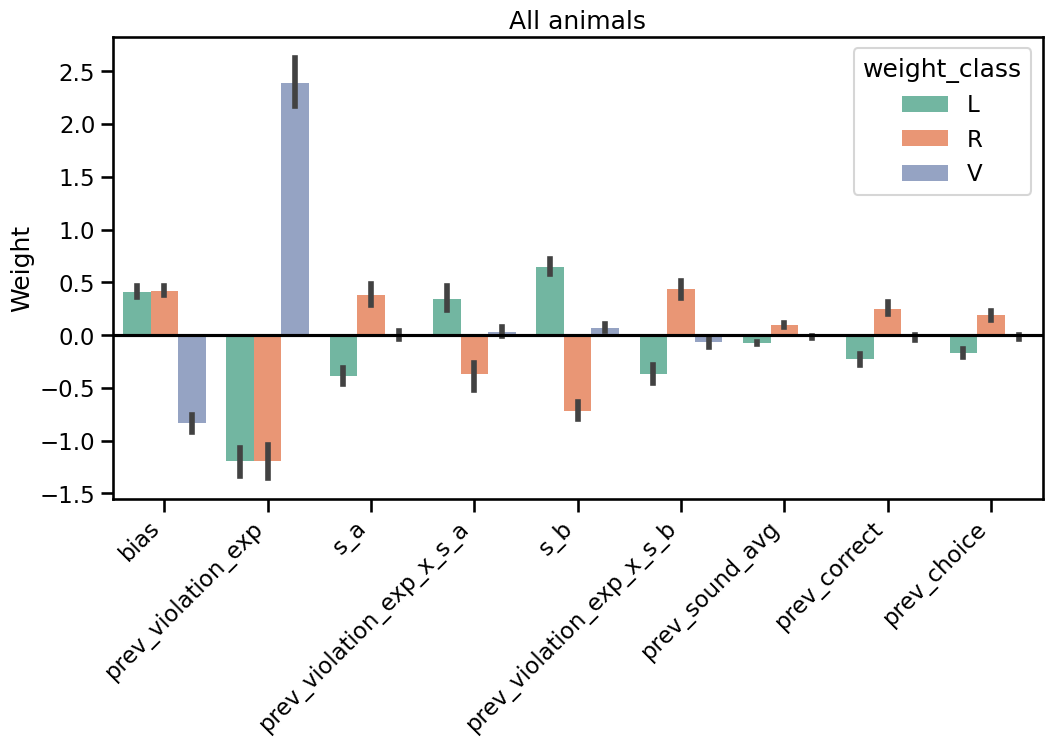

In [6]:
mv.plot_weights_summary(palette=palette, order=feature_order)

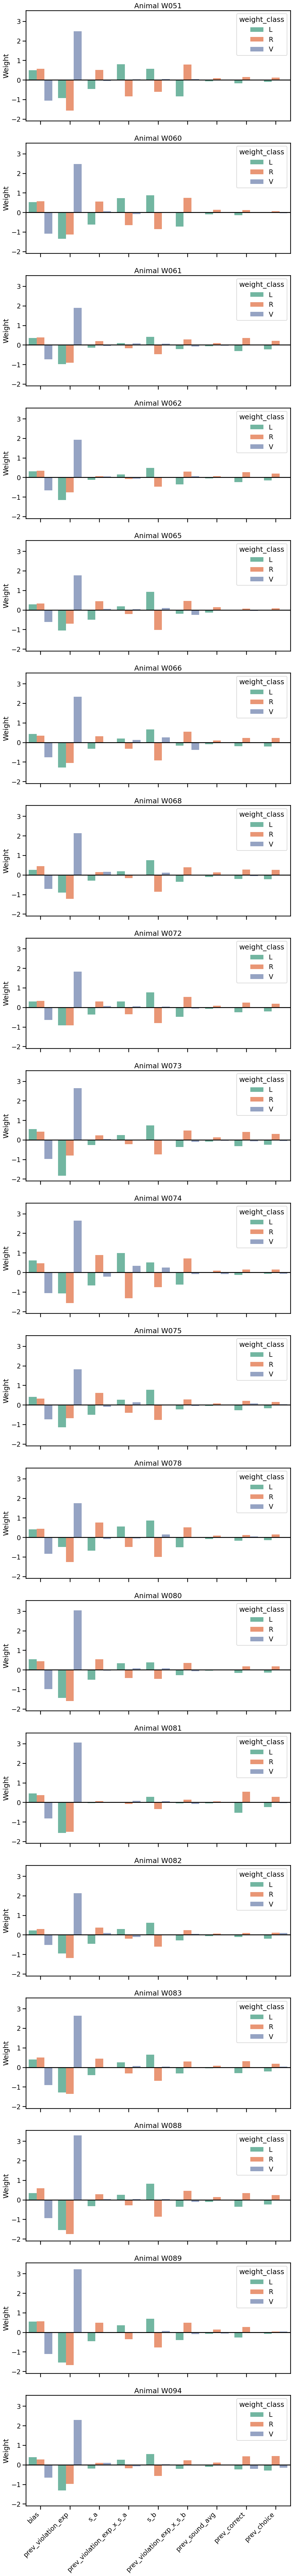

In [7]:
mv.plot_weights_by_animal(palette=palette, order=feature_order)

In [8]:
params = {
    "animals": None,
    "sigmas": [0.07, 0.13, 0.25, 0.5, 1, 2, 4, 8, 16],
    "random_state": 47,
    "model_config": {
        "model_class": MultiClassLogisticRegression,
        "model_type": "multi",
        "design_matrix_generator": "DesignMatrixGeneratorInteractions",
        "design_matrix_generator_args": {
            "filter_column": "prev_violation",
            "interaction_pairs": create_violation_interaction_pairs(
                ["s_a", "s_b", "prev_sound_avg", "prev_correct", "prev_choice"]
            ),
        },
    },
}

In [9]:
experiment2 = ExperimentSigmaSweep(params)
experiment2.run()
experiment2.save(file_name="2023_10_23_prev_violation_interactions_stim_and_prev")

returning viol dataset for all animals


 !!!!! evaluating animal W051 !!!!!


Optimization terminated successfully.
         Current function value: 41113.926131
         Iterations: 38
         Function evaluations: 57
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 40653.897266
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 49
Optimization terminated successfully.
         Current function value: 40424.025014
         Iterations: 36
         Function evaluations: 50
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 40344.532386
         Iterations: 36
         Function evaluations: 50
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 40323.206011
         Iterations: 37
         Function evaluations: 49
         Gradient evaluations: 49
Optimization terminated successfully.
   

In [10]:
# for weight plot
feature_order = [
    "bias",
    "prev_violation_exp",
    "s_a",
    "prev_violation_exp_x_s_a",
    "s_b",
    "prev_violation_exp_x_s_b",
    "prev_sound_avg",
    "prev_violation_exp_x_prev_sound_avg",
    "prev_correct",
    "prev_violation_exp_x_prev_correct",
    "prev_choice",
    "prev_violation_exp_x_prev_choice",
]

palette = "Set2"

mv2 = ModelVisualizer(experiment2)

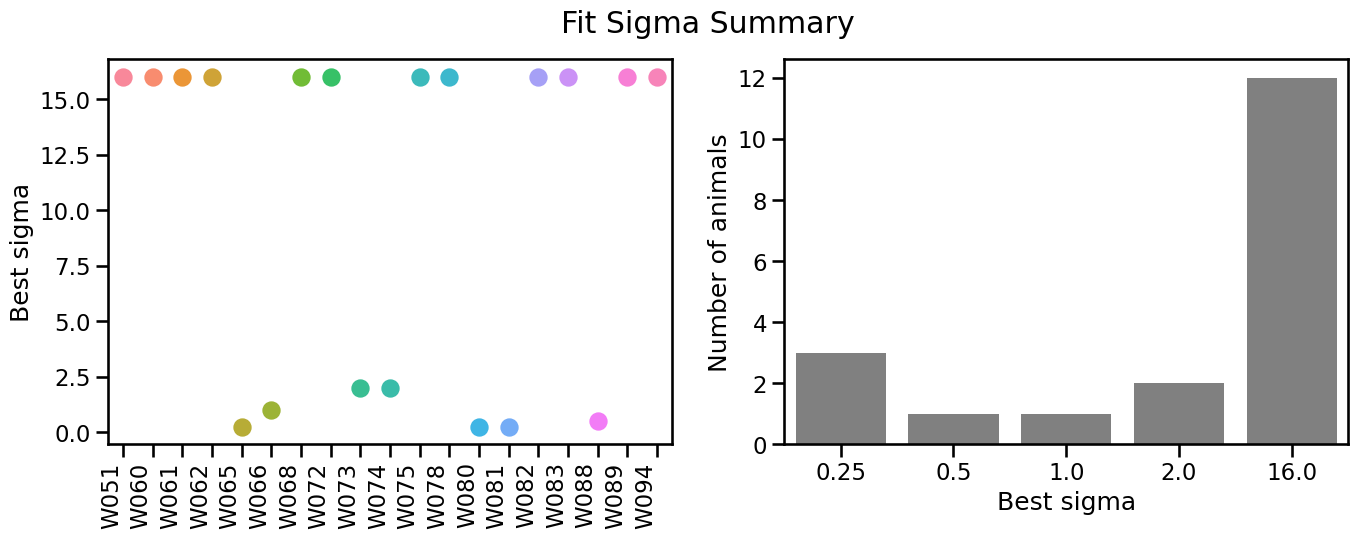

In [11]:
mv2.plot_sigma_summary()

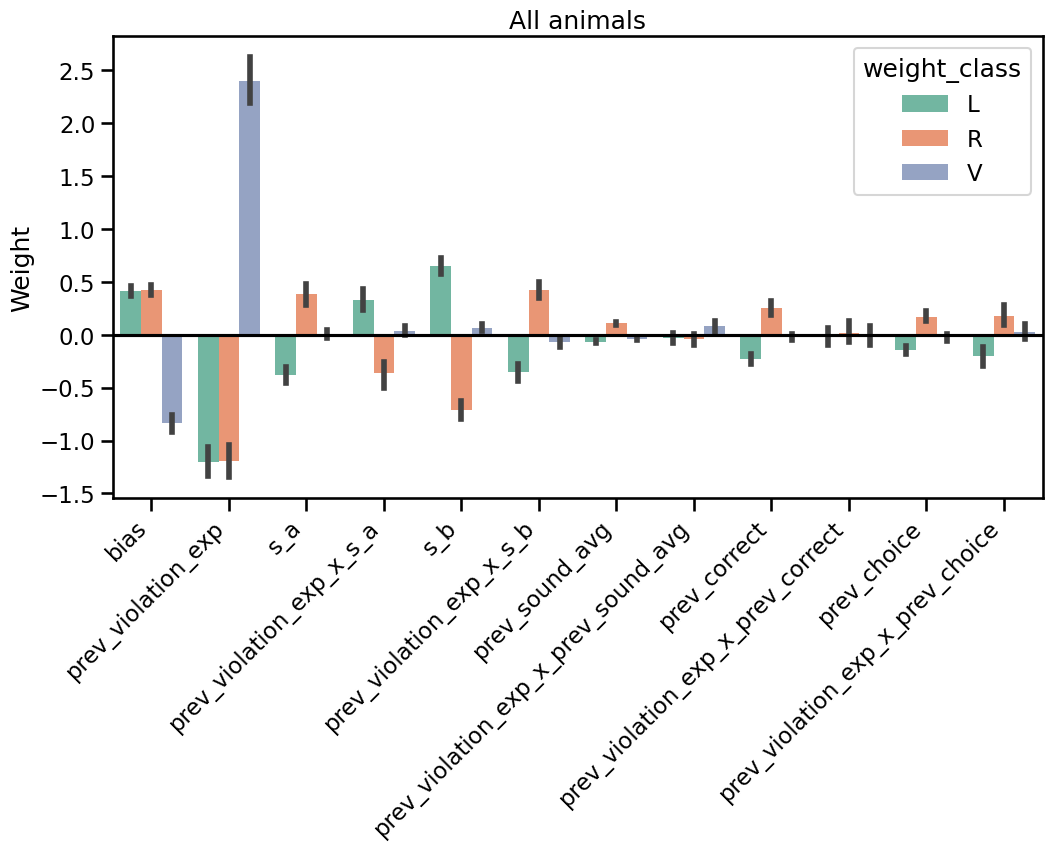

In [12]:
mv2.plot_weights_summary(palette=palette, order=feature_order)

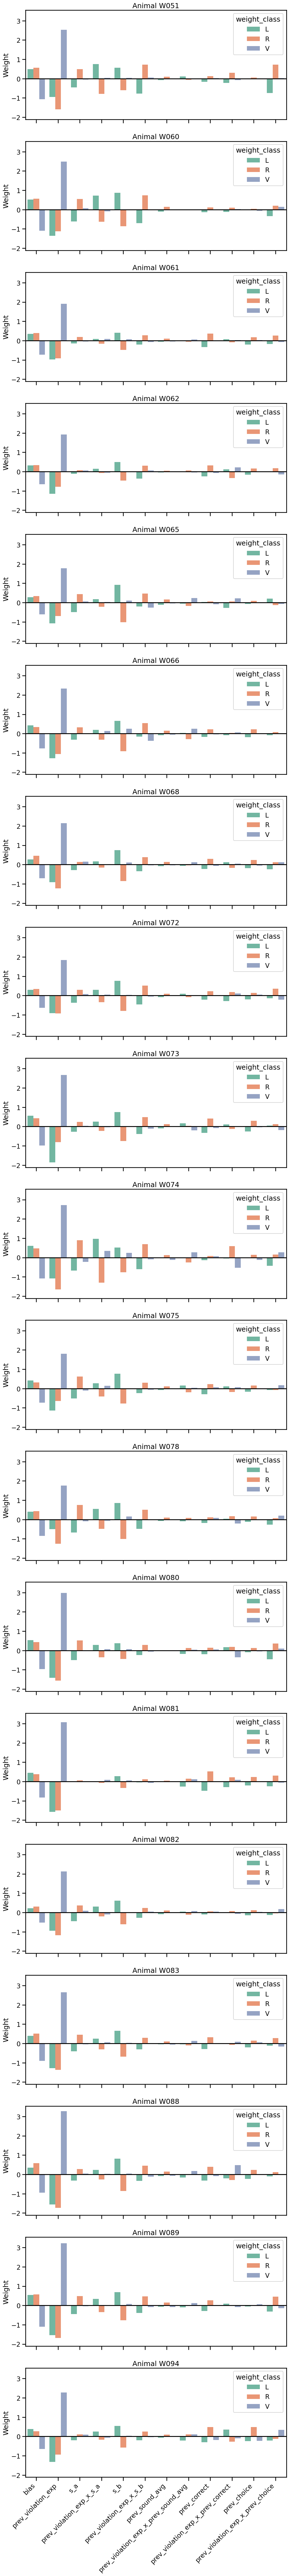

In [13]:
mv2.plot_weights_by_animal(palette=palette, order=feature_order)